# Задача 6. Линрег

Допустим, у вас есть два множества **A** и **B** точек на плоскости. Линейная регрессия на плоскости -- это 
просто прямая, ее можно представить как функцию $ y = ax + b$.

Линейная регрессия, обученная на множестве **А**, имеет коэффициент **$a > 0$**. То же самое верно и для линейной регрессии, обученной на множестве **B**. Правда ли, что если обучить линейную регрессию на множестве $A \cup B$, то у полученной прямой коэффициент **a** будет больше 0?

Если да -  докажите, если нет - постройте контрпример.

## Построим контрпример:
A = {(10,6), (8,7), (11,10), (13,9)} <br>
B = {(30,-26), (28,-24), (31,-26), (33,-22)}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
A = np.array([(10,6), (8,7), (11,10), (13,9)])
B = np.array([(30,-26), (28,-24), (31,-26), (33,-22)])

In [3]:
# Функция линейной регрессии. Возвращает коэффициенты a и b и обученную модель
def linear_regression(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)
    return model.coef_[0], model.intercept_, model

In [4]:
a_A, b_A, model_A = linear_regression(A)

a_B, b_B, model_B = linear_regression(B)

# Объединяем множества A и B
AB = np.vstack((A, B))
a_AB, b_AB, model_AB = linear_regression(AB)

In [5]:
# Визуализация результатов
def plot_regression(points, model, label, color):
    
    if color == 'red':
        X = points[:, 0].reshape(-1, 1)
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        plt.plot(x_range, model.predict(x_range), label=f'Прямая регрессии для {label}', color=color)
    else:
        X = points[:, 0].reshape(-1, 1)
        plt.scatter(X, points[:, 1], label=f'Множество {label}', color=color)
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        plt.plot(x_range, model.predict(x_range), label=f'Прямая регрессии для {label}', color=color)

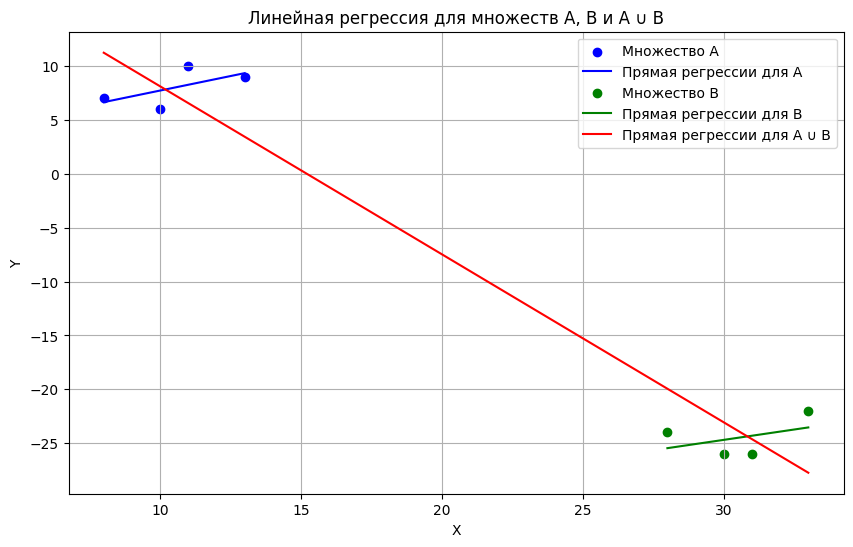

y_A = 0.54*x + 2.35
y_B = 0.38*x + -36.23
y_AB = -1.56*x + 23.72


In [6]:
plt.figure(figsize=(10, 6))

plot_regression(A, model_A, 'A', 'blue')

plot_regression(B, model_B, 'B', 'green')

plot_regression(AB, model_AB, 'A ∪ B', 'red')

plt.title('Линейная регрессия для множеств A, B и A ∪ B')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print(f'y_A = {round(a_A, 2)}*x + {round(b_A, 2)}')
print(f'y_B = {round(a_B, 2)}*x + {round(b_B, 2)}')
print(f'y_AB = {round(a_AB, 2)}*x + {round(b_AB, 2)}')

### Таким образом, утверждение не всегда верное. У первых двух множеств коэффициент ***a*** положительный, у их объединения отрицательный